In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from models import HighwayNetwork, PlainNetwork
from utils import *
%matplotlib inline

In [2]:
trainer = get_trainer()
x_feed,y_feed = trainer.next_batch()
num_classes = 10

# Plain Networks

In [3]:
PN = PlainNetwork(num_layers=50,num_nodes=500,input_size=x_feed.shape,num_classes=num_classes)
PN.initialize()

In [4]:
g = PN.g
sess = tf.Session(graph=g)
sess.run(PN.init)
num_steps = 2000
losses = []
for i in tqdm(range(num_steps)):
    x_feed,y_feed = trainer.next_batch()
    fd = {PN.x : x_feed, PN.y : y_feed}
    l , _ = sess.run([PN.loss,PN.opt],feed_dict = fd)
    losses.append(l)

100%|██████████| 2000/2000 [01:58<00:00, 16.94it/s]


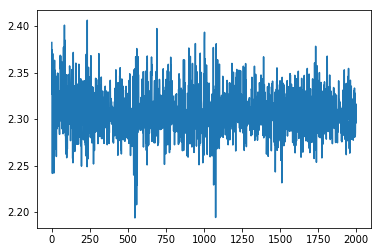

In [5]:
plt.plot(losses)

# Highway Networks

In [6]:
HN = HighwayNetwork(num_blocks=100,num_nodes=500,input_size=x_feed.shape,num_classes=num_classes)
HN.initialize()

In [7]:
g = HN.g
sess = tf.Session(graph=g)
sess.run(HN.init)
num_steps = 2000
losses = []
for i in tqdm(range(num_steps)):
    x_feed,y_feed = trainer.next_batch()
    fd = {HN.x : x_feed, HN.y : y_feed}
    l , _ = sess.run([HN.loss,HN.opt],feed_dict = fd)
    losses.append(l)

100%|██████████| 2000/2000 [10:33<00:00,  2.25it/s]


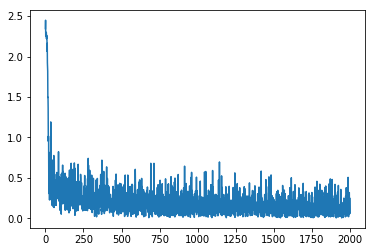

In [8]:
plt.plot(losses)

# Visualize Biases and Information Highways

In [9]:
transform_biases = HN.get_transform_biases()
bias_vals = sess.run(transform_biases)

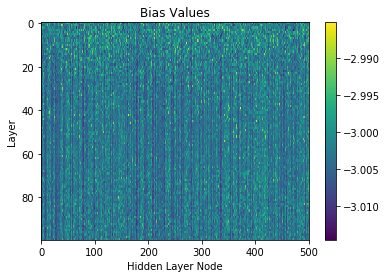

In [16]:
plt.imshow(np.array(bias_vals),aspect='auto')
plt.title('Bias Values')
plt.xlabel('Hidden Layer Node')
plt.ylabel('Layer')
plt.colorbar()

In [13]:
transform_activations = HN.get_transform_activations()
transform_vals = sess.run(transform_activations,feed_dict=fd)

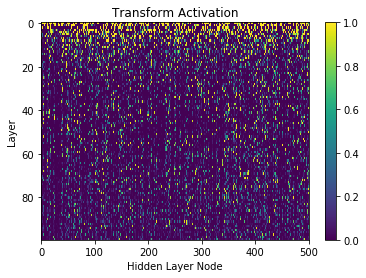

In [14]:
plt.imshow(np.array(transform_vals)[:,0,0,:],aspect='auto')
plt.title('Transform Activation')
plt.xlabel('Hidden Layer Node')
plt.ylabel('Layer')
plt.colorbar()

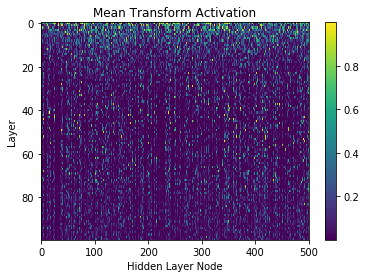

In [15]:
plt.imshow(np.mean(np.array(transform_vals),axis=(1,2)),aspect='auto')
plt.title('Mean Transform Activation')
plt.xlabel('Hidden Layer Node')
plt.ylabel('Layer')
plt.colorbar()